# [Semantic Search](https://huggingface.co/spaces/sentence-transformers/embeddings-semantic-search)
- Semantic search seeks to improve search accuracy by understanding the content of the search query. In contrast to traditional search engines, which only find documents based on lexical matches, semantic search can also find synonyms.
- [Dense vs Sparse Vectors](https://www.pinecone.io/learn/series/nlp/dense-vector-embeddings-nlp/)
    - 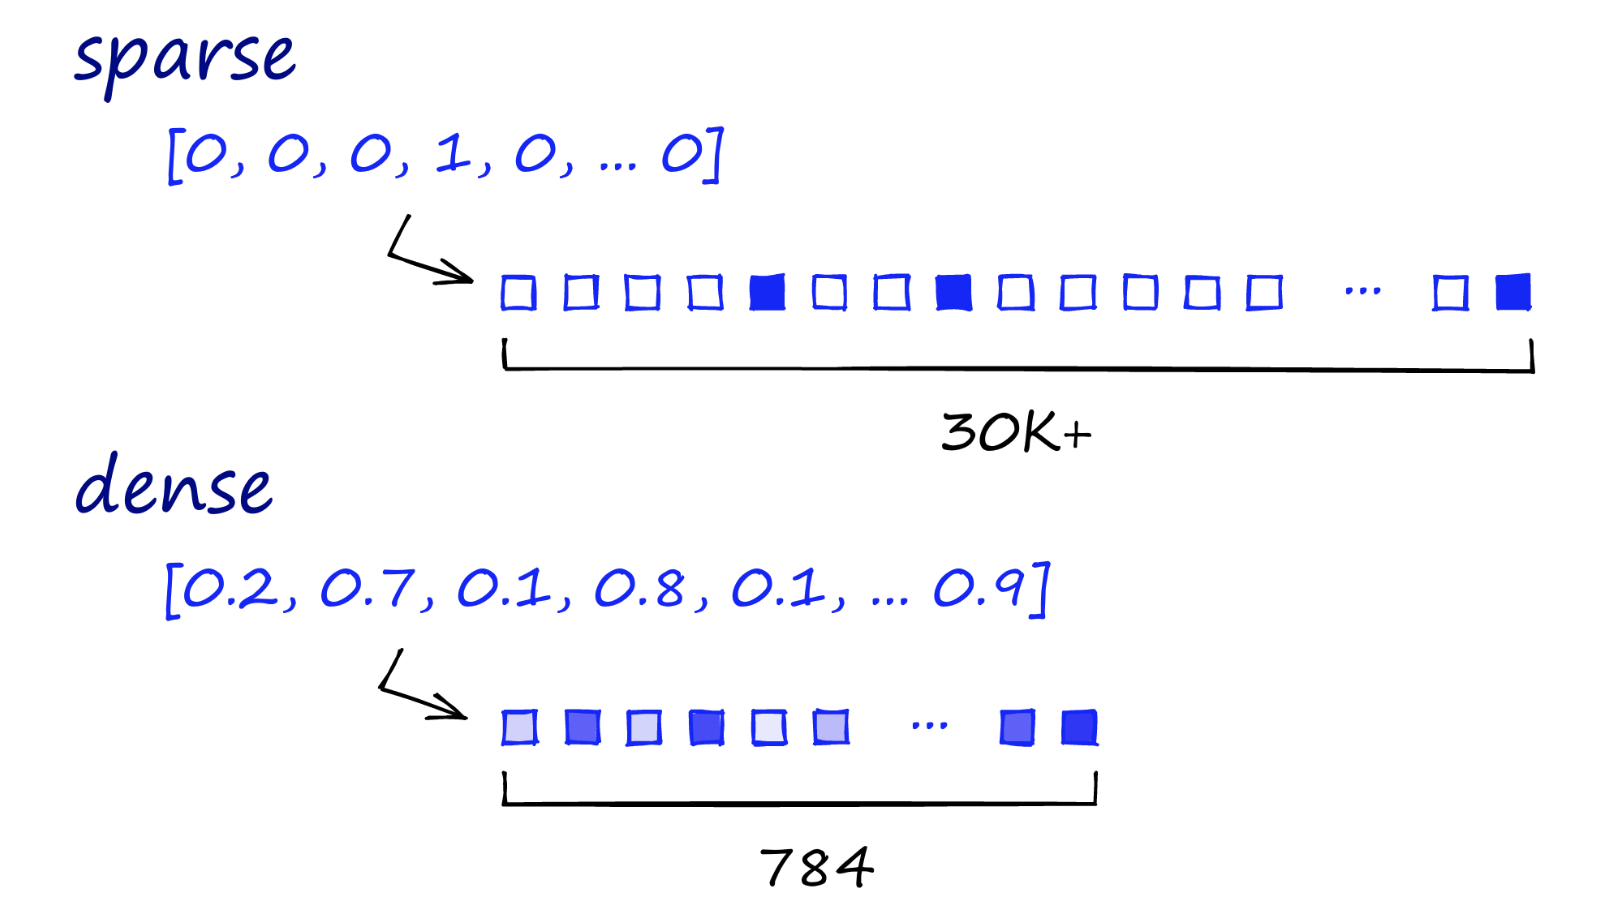
    - Sparse captures syntax and words (but not the meaning fully). For e.g. `Bill ran from dolphin to girafee` and `Bill ran from giraffe to dolphin` represented in sparse vectors doesn't quite identify that there is some similiarity in the sentences
    - Dense vectors captures the meaning/semantics. In fact, you can apply arithmetic to words/sentences/ Word2Vec in 2013 was the first library to get dense vectors (there is sentence2vec, doc2vec and so on subsequently). A popular example is 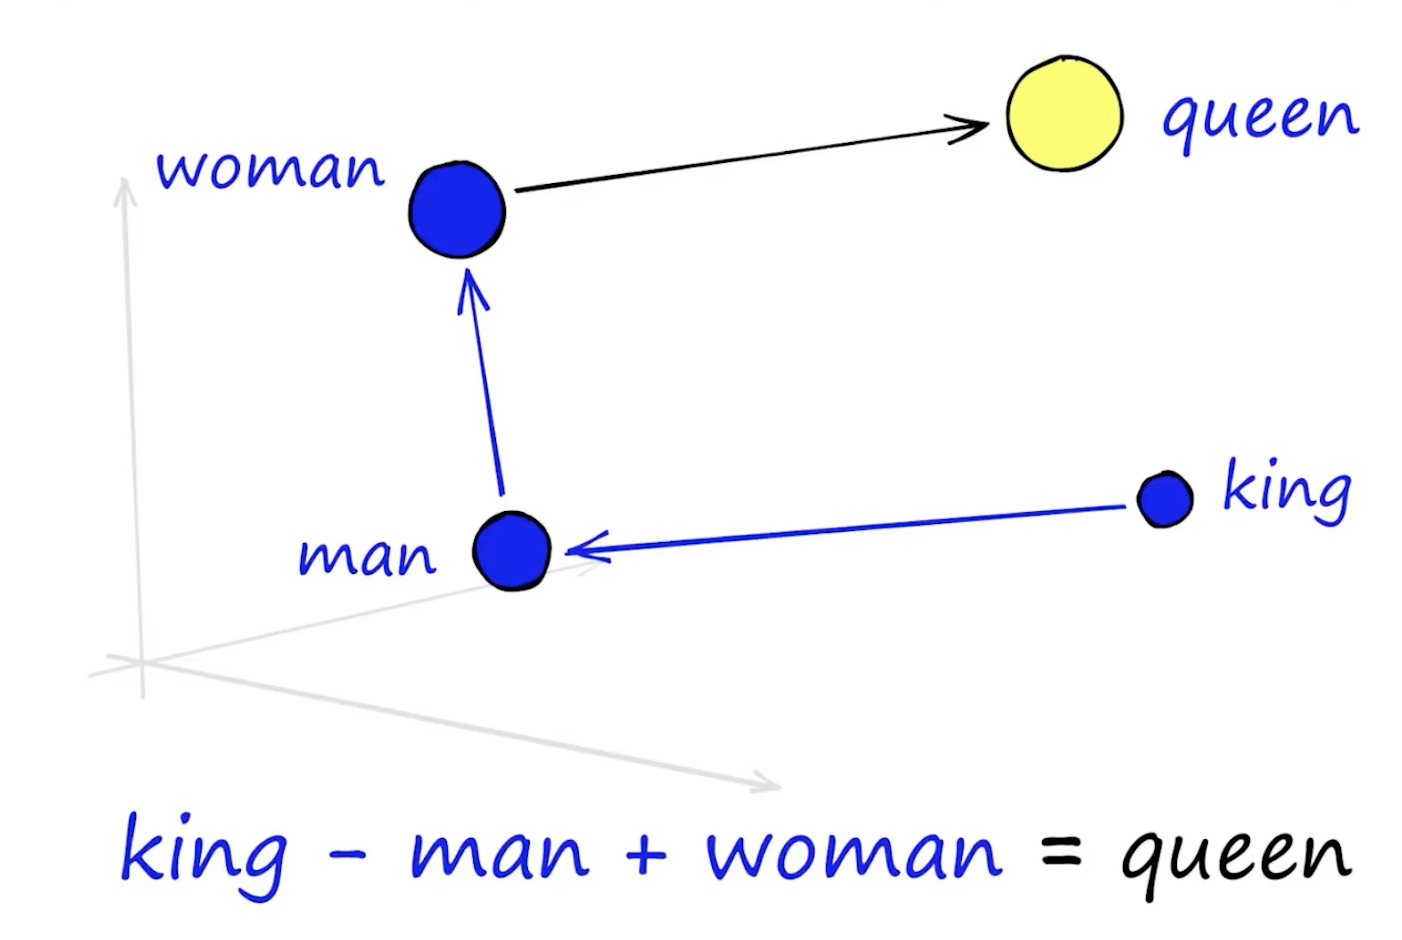
    - A simple way to think is BERT (bi-directional encoder representations from transformers). For a given word, takes the words before and after (certain length of window) and performs one hot encoding to get the dense vector for that word. Of course, it does it on every place in the corpus where the word occurs 

## [What happens underneath? Obtaining embeddings](https://sentence-transformers-embeddings-semantic-search.hf.space/?embed=true&embed_options=show_toolbar#what-happens-underneath-obtaining-embeddings)
- The understanding of each text will be reflected in a vector called embedding (which is again dependent on the model we choose as weights and biases are a function of the underlying data used to train the model)
- 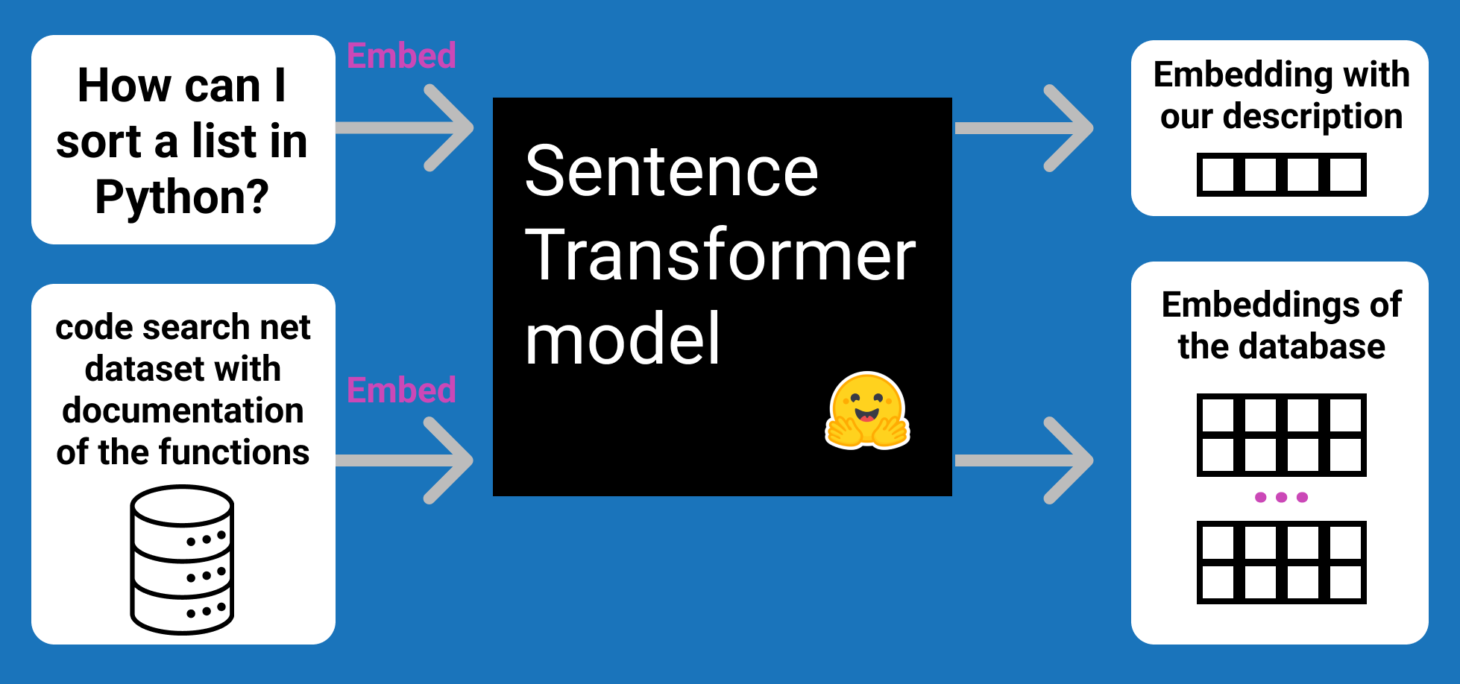
- 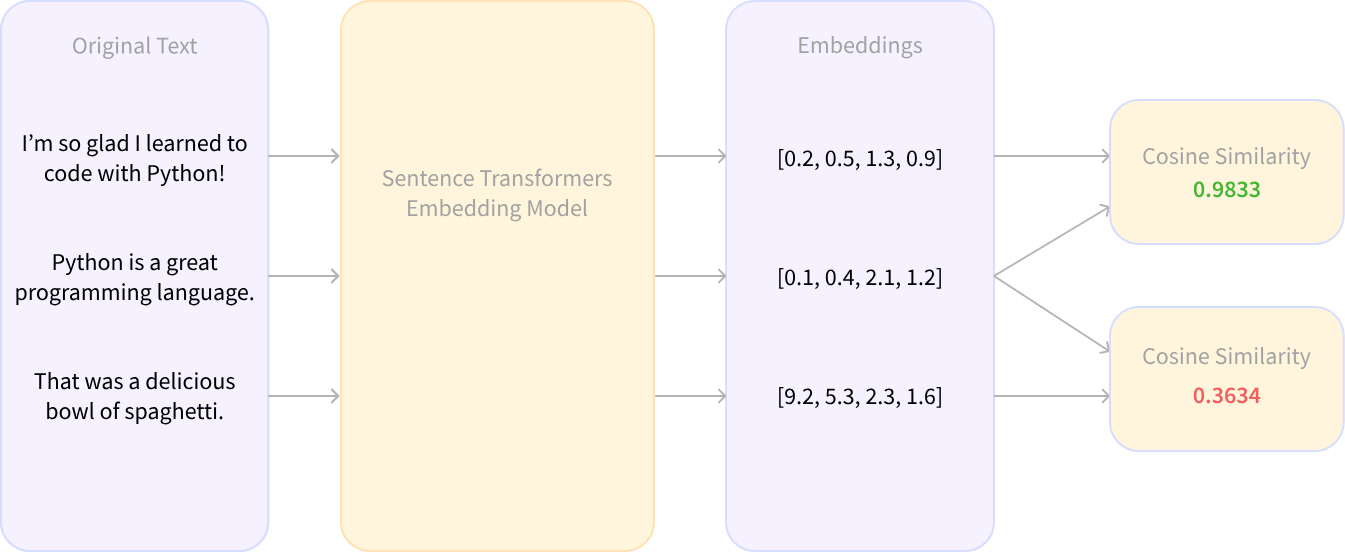  

### How is this different from Q&A (RAG implementation OR DPR (dense passage retrieval))
- Q&A models are trained for identifying pairs of q&a that are most similar. The training of Q&A models is done by passing in questions and answers through their own encoders and minimizing the loss function. See the different formats of passing in [data](https://huggingface.co/blog/how-to-train-sentence-transformers#how-to-prepare-your-dataset-for-training-a-sentence-transformers-model) while fine-tuning/training transformers 

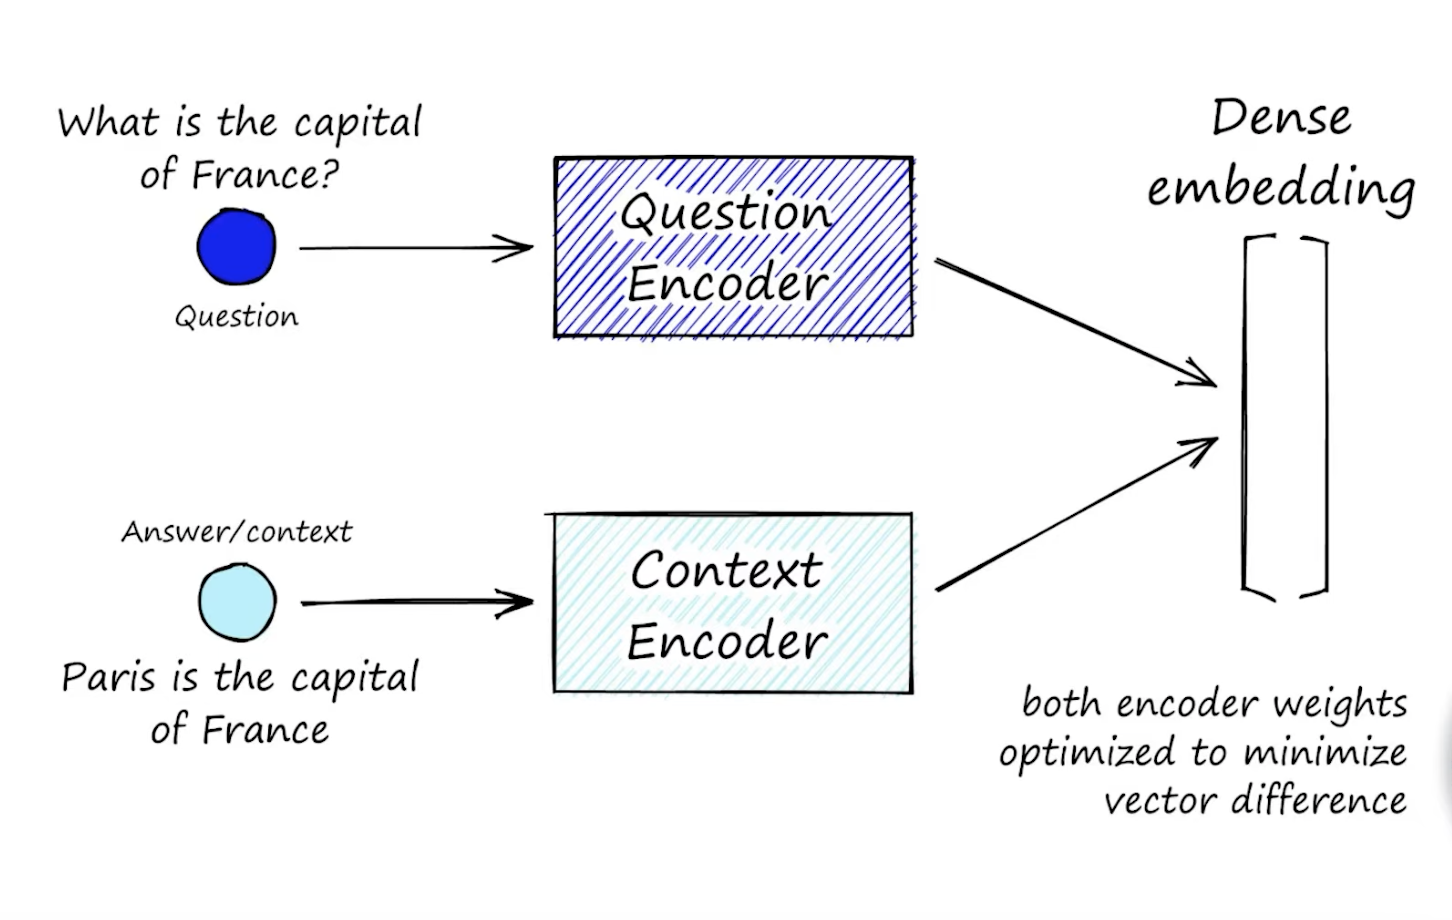  
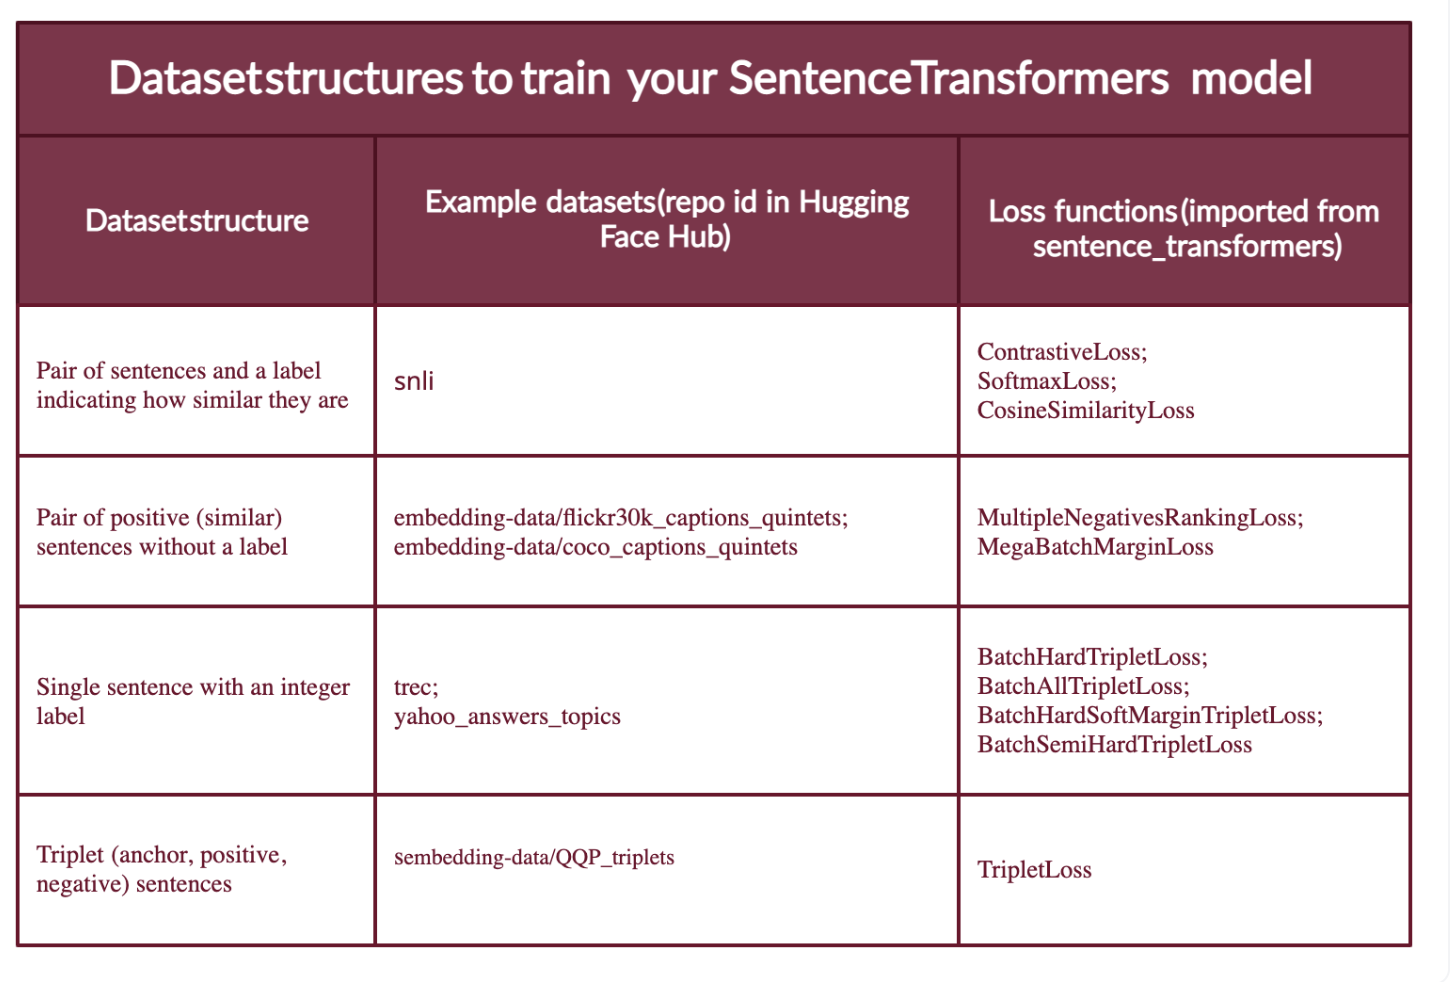

## [Obtaining the closest observations in the vector space](https://sentence-transformers-embeddings-semantic-search.hf.space/?embed=true&embed_options=show_toolbar#obtaining-the-closest-observations-in-the-vector-space)
- Most similar queries will be closer together in the vector space, and queries that differ most will be farther apart.
- Distance (**cosine is the most popular**) measures closeness. How do we calculate distance (we generally think of straight line which is euclidean distance). There are other measures (Minkowski, Euclidean, Manhattan, Hamming, dot_product etc.)
- **Cosine similarity is given by Cos θ, and cosine distance is 1- Cos θ**
- If the data dimensionality is very high, then Manhatten distance is used   
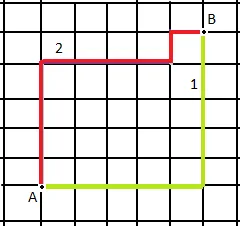  
- We compare the embedding of our query with the embeddings of each of the texts in the database (there are easier ways to do it, but in this case, it won't be necessary) using the cosine similarity function, better explained in the [Pytorch documentation] Pytorch documentation. The results of the cosine similarity function will detect which of the texts in the database are closest to our query in vector space.
- 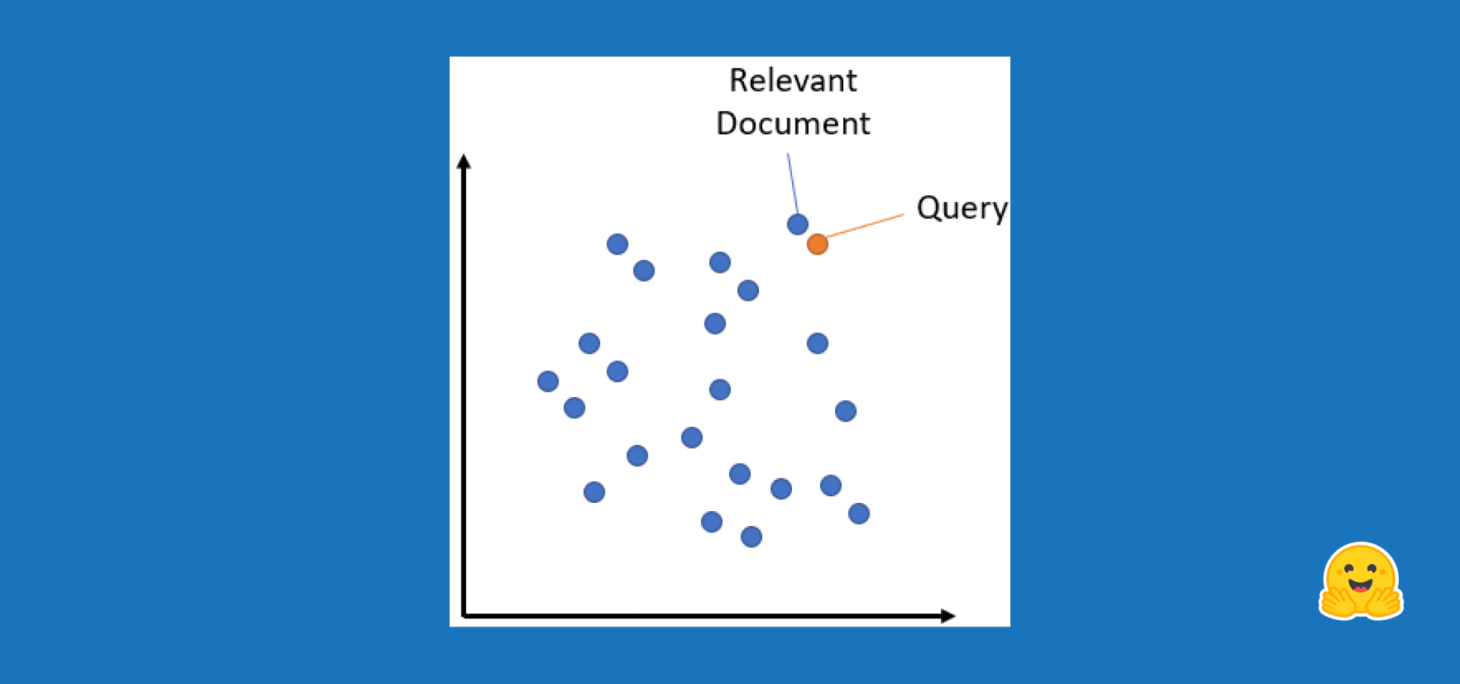

## Index of learning
- [Getting started with embeddings](https://huggingface.co/blog/getting-started-with-embeddings)
- [Your First Sentence Transformers Project](https://huggingface.co/blog/your-first-ml-project)
- [Retrieve and Rerank](https://www.sbert.net/examples/applications/retrieve_rerank/README.html)
- Original sbert model - bert-base-nli-mean-tokens
- Microsoft mpnet* models (max seq length increased from 128 to 384) and RoBERTa models do pretty well
- [Select your PreTrained model](https://www.sbert.net/docs/pretrained_models.html)
- [Train sentence transformers](https://www.pinecone.io/learn/series/nlp/train-sentence-transformers-softmax/) / [Notebook](https://colab.research.google.com/github/huggingface/blog/blob/main/notebooks/95_Training_Sentence_Transformers.ipynb)

# Huggingface login
- To downloads models

In [1]:
# If notebook_login() doesn't work use interpretor_login
from huggingface_hub import notebook_login, interpreter_login
notebook_login()
# interpreter_login()

Token has not been saved to git credential helper.


In [2]:
from treelib import Node, Tree

def return_tree(myarray):
    tree = Tree()
    tree.create_node("ROOT", "ROOT".lower())  # root node
    for cat in myarray:
        current_data = cat.split("|")
        current_data.remove("ROOT") #Root node is added already

        for idx, ele in enumerate(current_data):
            if idx == 0:
                if not tree.get_node(ele.lower()): 
                    tree.create_node(ele, ele.lower(), parent="root")
            else:
                if not tree.get_node(ele.lower()):
                    tree.create_node(ele, ele.lower(), parent=current_data[idx - 1].lower())
    return tree

# Clustering - A simple example 
- https://www.sbert.net/examples/applications/semantic-search/README.html
- ![Clustering](./clustering_visual.gif)

In [3]:
"""
This is a simple application for sentence embeddings: semantic search

We have a corpus with various sentences. Then, for a given query sentence,
we want to find the most similar sentence in this corpus.

This script outputs for various queries the top 5 most similar sentences in the corpus.
"""
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('msmarco-distilbert-base-v4') #msmarco-distilbert-base-v4 #all-MiniLM-L6-v2

# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'A cheetah is running behind its prey.'
          ]
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

# Query sentences:
queries = ['A man is eating pasta.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah chases prey on across a field.']


# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(corpus))
for query in queries:
    query_embedding = embedder.encode(query, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    top_results = torch.topk(cos_scores, k=top_k)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for score, idx in zip(top_results[0], top_results[1]):
        print(corpus[idx], "(Score: {:.4f})".format(score))

    """
    # Alternatively, we can also use util.semantic_search to perform cosine similarty + topk
    hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=5)
    hits = hits[0]      #Get the hits for the first query
    for hit in hits:
        print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))
    """





Query: A man is eating pasta.

Top 5 most similar sentences in corpus:
A man is eating food. (Score: 0.6813)
A man is eating a piece of bread. (Score: 0.6383)
A man is riding a horse. (Score: 0.3423)
A man is riding a white horse on an enclosed ground. (Score: 0.2656)
A woman is playing violin. (Score: 0.1668)




Query: Someone in a gorilla costume is playing a set of drums.

Top 5 most similar sentences in corpus:
A monkey is playing drums. (Score: 0.6654)
A woman is playing violin. (Score: 0.2791)
A man is riding a horse. (Score: 0.2270)
A man is eating a piece of bread. (Score: 0.2009)
A man is riding a white horse on an enclosed ground. (Score: 0.1939)




Query: A cheetah chases prey on across a field.

Top 5 most similar sentences in corpus:
A cheetah is running behind its prey. (Score: 0.7971)
Two men pushed carts through the woods. (Score: 0.3111)
A man is riding a white horse on an enclosed ground. (Score: 0.2418)
A man is riding a horse. (Score: 0.1438)
The girl is carry

# Apply to job descriptions

In [6]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()
df_sample = pd.read_parquet("../../../data/clarivate_analytics.parquet")

In [7]:
df_sample.groupby(["AGGREGATED_JOB_TITLE"]).agg(
    {"ACTUAL_JOB_TITLE":"count"}).sort_values(by=["ACTUAL_JOB_TITLE"],ascending=False).head(20)

,ACTUAL_JOB_TITLE
AGGREGATED_JOB_TITLE,
Associate Content Editor,36
Senior Data Scientist,10
Patent Analyst,10
Associate Consultant,10
Content Editor,9
Product Owner,8
PCT Patent Analyst,8
Lead Software Engineer,8
Digital Account Manager,8


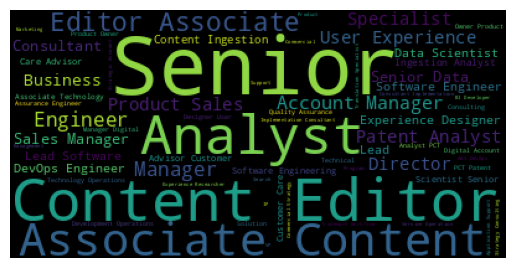

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud2 = WordCloud().generate(' '.join(df_sample["AGGREGATED_JOB_TITLE"]))
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

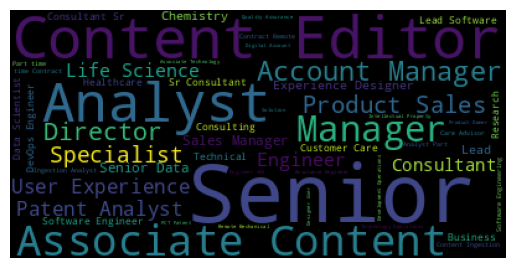

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud2 = WordCloud().generate(' '.join(df_sample["ACTUAL_JOB_TITLE"]))
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

### Clean
- Remove `&amp;`

In [11]:
print("=============BEFORE CLEANING &amp;==============")
print(df_sample[df_sample["ACTUAL_JOB_TITLE"].str.contains("&amp;",case=False)]["ACTUAL_JOB_TITLE"].count())

def clean(value):
    if value is not None:
        value = value.replace("&amp;","&").strip()
        return value
    else:
        return value
df_sample["ACTUAL_JOB_TITLE"] = df_sample["ACTUAL_JOB_TITLE"].apply(clean)
print("=============AFTER CLEANING &amp;==============")
print(df_sample[df_sample["ACTUAL_JOB_TITLE"].str.contains("&amp;",case=False)]["ACTUAL_JOB_TITLE"].count())


=============BEFORE CLEANING &amp;==============
0
=============AFTER CLEANING &amp;==============
0


# Clustering

### Community Clustering

In [12]:
"""
This is a more complex example on performing clustering on large scale dataset.

This examples find in a large set of sentences local communities, i.e., groups of sentences that are highly
similar. You can freely configure the threshold what is considered as similar. A high threshold will
only find extremely similar sentences, a lower threshold will find more sentence that are less similar.

A second parameter is 'min_community_size': Only communities with at least a certain number of sentences will be returned.

The method for finding the communities is extremely fast, for clustering 50k sentences it requires only 5 seconds (plus embedding comuptation).

In this example, we download a large set of questions from Quora and then find similar questions in this set.
"""
from sentence_transformers import SentenceTransformer, util
import os
import csv
import time


# Model for computing sentence embeddings. We use one trained for similar questions detection
model = SentenceTransformer('all-mpnet-base-v2') #all-MiniLM-L6-v2 #all-mpnet-base-v2 is the one that pinecone found useful

corpus_sentences = list(df_sample["ACTUAL_JOB_TITLE"])
print("Encode the corpus. This might take a while")
corpus_embeddings = model.encode(corpus_sentences, batch_size=64, show_progress_bar=True, convert_to_tensor=True)


print("Start clustering")
start_time = time.time()

#Two parameters to tune:
#min_cluster_size: Only consider cluster that have at least 25 elements
#threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
clusters = util.community_detection(corpus_embeddings, min_community_size=5, threshold=0.7)

print("Clustering done after {:.2f} sec".format(time.time() - start_time))
        
for i, cluster in enumerate(clusters):
    print(f"\nCluster {i+1}, #{len(cluster)} Elements: {min([corpus_sentences[i] for i in cluster], key=len)}  ")
    print([corpus_sentences[i] for i in cluster])
    

Encode the corpus. This might take a while


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

Start clustering
Clustering done after 0.02 sec

Cluster 1, #33 Elements: Product Sales Manager  
['Senior Product Sales Manager', 'Senior Product Sales Manager', 'Senior Product Sales Manager- Life Sciences & Healthcare', 'Senior Product Sales Manager, Research Office, A&G', 'Senior Product Sales Manager, Research Office, A&G', 'Product Sales Manager', 'Product Sales Manager', 'Product Sales Manager', 'Senior Content Marketing Manager', 'Senior Content Marketing Manager', 'Senior Program Manager', 'Senior Program Manager', 'Senior Program Manager', 'Director, Product Sales', 'Director, Product Sales', 'Vice President, Product Management', 'Vice President, Product Management', 'Vice President, Product Management', 'Vice President, Product Management', 'Senior Manager, Product Sales (Patent Intelligence Solutions)', 'Senior Manager, Product Sales (Patent Intelligence Solutions)', 'Senior Manager, Product Sales (Patent Intelligence Solutions)', 'Senior Manager, Product Sales (Patent Inte

### Agglomerative Clustering
- agglomerative.py shows an example of using Hierarchical clustering using the Agglomerative Clustering Algorithm. In contrast to k-means, we can specify a threshold for the clustering: Clusters below that threshold are merged. This algorithm can be useful if the number of clusters is unknown. By the threshold, we can control if we want to have many small and fine-grained clusters or few coarse-grained clusters.

In [13]:
"""
This is a simple application for sentence embeddings: clustering

Sentences are mapped to sentence embeddings and then agglomerative clustering with a threshold is applied.
"""
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np

embedder = SentenceTransformer('all-MiniLM-L6-v2')

# Corpus with example sentences
corpus = list(df_sample["ACTUAL_JOB_TITLE"].unique())
corpus_embeddings = embedder.encode(corpus)

# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

# Perform kmean clustering
clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5) #, affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in clustered_sentences.items():
    print(f"Cluster {i+1}: {min(cluster, key=len)}")
    print(cluster)
    print("")
    
# Check if a job title in two or more clusters. If common_set contains at least one element, then yes
common_set = set()
for i, cluster in clustered_sentences.items():
    common_set = common_set.intersection(set(cluster))
    
if common_set:
    print(f"Elements: {common_set} are present in more than one cluster") 

Cluster 7: Business Analyst
['Business Analyst', 'Associate Software Engineer', 'Compliance Analyst', 'Associate Technology Operations Analyst', 'Associate Research Analyst', 'BI Developer - Solutions Analyst', 'Senior Corporate Strategy Analyst (Higher Education/Academia)', 'Operational Excellence Analyst - RPA', 'Technical Support Analyst', 'Technical Analyst', 'Senior Business Analyst', 'Solutions Analyst']

Cluster 6: Patent Analyst - Remote Contract
['Business Analyst - Intellectual Property', 'Patent Classification Specialist (Computer Science)', 'Patent Classification Specialist (Biotech)', 'Patent Classification Specialist (Physics/Electrical Engineering)', 'Patent Analyst (Part time/Contract, Remote)', 'Patent Analyst (Part time/Contract, Remote) - Mechanical, Electrical, Computer', 'Patent Analyst - Remote Contract']

Cluster 10: Account Specialist
['Account Specialist', 'Product Specialist, Customer Care', 'Senior Billing & Renewal Specialist', 'Senior Application Support Sp

# MANUAL CLUSTERING USING COSINE PRODUCT
## Symmetric vs. Asymmetric Semantic Search
A critical distinction for your setup is symmetric vs. asymmetric semantic search:

- For symmetric semantic search your query and the entries in your corpus are of about the same length and have the same amount of content. An example would be searching for similar questions: Your query could for example be “How to learn Python online?” and you want to find an entry like “How to learn Python on the web?”. For symmetric tasks, you could potentially flip the query and the entries in your corpus - Pre-trined Models suitable [here](https://www.sbert.net/docs/pretrained_models.html#sentence-embedding-models)

- For asymmetric semantic search, you usually have a short query (like a question or some keywords) and you want to find a longer paragraph answering the query. An example would be a query like “What is Python” and you wand to find the paragraph “Python is an interpreted, high-level and general-purpose programming language. Python’s design philosophy …”. For asymmetric tasks, flipping the query and the entries in your corpus usually does not make sense. Pre-trained Models suitable [here](https://www.sbert.net/docs/pretrained-models/msmarco-v3.html)

### Cosine Similarity search
- We can find highest cosine similarity for every element in a corpus running against its own list OR another list and collect top_k and cluster them
- First see if there are any close duplicates (if there are , they come out with very high similarity score)

### Cosine vs. Dot
- Models tuned for cosine-similarity will prefer the retrieval of shorter passages, while models for dot-product will prefer the retrieval of longer passages. Depending on your task, you might prefer the one or the other type of model.

### Choosing your model
- https://www.sbert.net/docs/pretrained-models/msmarco-v3.html

In [14]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-mpnet-base-v2') # msmarco-distilroberta-base-v3 #all-MiniLM-L6-v2 #all-mpnet-base-v2 (pine cone found this good)

# Single list of sentences
sentences = list(df_sample["ACTUAL_JOB_TITLE"].unique())

#Compute embeddings
embeddings = model.encode(sentences, convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.cos_sim(embeddings, embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

for pair in pairs[0:10]:
    i, j = pair['index']
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], pair['score']))

Customer Care Advisor - Patent Annuities 		 Customer Care Advisor – Patent Annuities 		 Score: 0.9965
Senior Account Manager - Life Science & Healthcare 		 Senior Account Manager - Life Science and Healthcare 		 Score: 0.9923
Service Operations IP Analyst 		 Service Operation IP Analyst 		 Score: 0.9716
Quality Assurance Engineer, Connect Nextgen 		 Senior Quality Assurance Engineer, Connect Nextgen 		 Score: 0.9671
Customer Care Advisor 1 - Technical 		 Customer Care Advisor - Technical 		 Score: 0.9645
Senior Manager, Consulting - Commercial Strategy Consulting 		 Senior Manager, Commercial Strategy Consulting 		 Score: 0.9614
User Experience Designer-2 		 User Experience Designer-1 		 Score: 0.9587
Senior Account Manager - Life Science & Healthcare LATAM 		 Senior Account Manager - Life Science & Healthcare 		 Score: 0.9555
User Experience Designer-3 		 User Experience Designer-2 		 Score: 0.9508
Senior Account Manager - Life Science & Healthcare LATAM 		 Senior Account Manager - Li

## Simple user query

In [15]:
query = "UX designer"
query_embedding = model.encode(query)
cosine_scores = util.cos_sim(query_embedding, embeddings)
print(cosine_scores)
print(cosine_scores.argmax().item())
print(f"{query} is most similar to {sentences[cosine_scores.argmax().item()]}")

tensor([[0.4933, 0.3007, 0.4908, 0.4275, 0.4457, 0.3288, 0.4492, 0.3537, 0.3876,
         0.2187, 0.3559, 0.4407, 0.1688, 0.2546, 0.3134, 0.3239, 0.3617, 0.0543,
         0.3334, 0.3232, 0.3170, 0.2313, 0.3344, 0.3566, 0.3529, 0.3018, 0.3442,
         0.2575, 0.2836, 0.1563, 0.1247, 0.4860, 0.6511, 0.3885, 0.4097, 0.3451,
         0.4675, 0.3975, 0.3633, 0.4426, 0.4180, 0.3197, 0.4008, 0.3931, 0.4165,
         0.5590, 0.4383, 0.5000, 0.3586, 0.3031, 0.4014, 0.2803, 0.4278, 0.4830,
         0.3074, 0.2009, 0.2083, 0.2681, 0.3309, 0.1516, 0.1681, 0.0985, 0.2219,
         0.3659, 0.4776, 0.3539, 0.3385, 0.4179, 0.3422, 0.4390, 0.2837, 0.3660,
         0.1934, 0.4007, 0.1982, 0.3143, 0.3150, 0.3794, 0.4303, 0.2912, 0.2487,
         0.2225, 0.2536, 0.2860, 0.2413, 0.3727, 0.1659, 0.1772, 0.2069, 0.1978,
         0.2386, 0.2812, 0.3443, 0.3801, 0.5433, 0.3928, 0.4186, 0.1780, 0.3216,
         0.3318, 0.2787, 0.3617, 0.4586, 0.4186, 0.6657, 0.7430, 0.7693, 0.7712,
         0.3142, 0.3155, 0.2

# Another approach - paraphrase mining

In [16]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('paraphrase-MiniLM-L6-v2') #msmarco-distilbert-base-tas-b #all-MiniLM-L6-v2

# Single list of sentences - Possible tens of thousands of sentences
sentences = list(df_sample["ACTUAL_JOB_TITLE"].unique())

paraphrases = util.paraphrase_mining(model, sentences)

# Get a few and print
for paraphrase in paraphrases[0:10]:
    score, i, j = paraphrase
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], score))

Customer Care Advisor - Patent Annuities 		 Customer Care Advisor – Patent Annuities 		 Score: 0.9936
Senior Account Manager - Life Science & Healthcare 		 Senior Account Manager - Life Science and Healthcare 		 Score: 0.9928
Service Operations IP Analyst 		 Service Operation IP Analyst 		 Score: 0.9851
Senior Manager, Consulting - Commercial Strategy Consulting 		 Senior Manager, Commercial Strategy Consulting 		 Score: 0.9599
Translation Specialist - Chinese Patent Content 		 Translation Specialist - Chinese Patent Content (Chemistry) 		 Score: 0.9547
Service Operations Senior IP Analyst 		 Service Operations IP Analyst 		 Score: 0.9501
Customer Care Advisor 1 - Technical 		 Customer Care Advisor - Technical 		 Score: 0.9492
User Experience Designer-2 		 User Experience Designer-1 		 Score: 0.9482
Senior Content Ingestion Analyst 		 Content Ingestion Analyst 		 Score: 0.9399
Service Operations Senior IP Analyst 		 Service Operation IP Analyst 		 Score: 0.9376


# Already known clusters
- If you already know the target clusters

In [ ]:
from sentence_transformers import SentenceTransformer, util
import torch

model = SentenceTransformer('msmarco-distilbert-base-tas-b') #msmarco-distilbert-base-tas-b #all-MiniLM-L6-v2

# Single list of sentences
sentences = list(df_sample["ACTUAL_JOB_TITLE"].unique())

target_clusters = list(df_sample["AGGREGATED_JOB_TITLE"].unique())

#Compute embeddings
embeddings1 = model.encode(sentences, convert_to_tensor=True)
embeddings2 = model.encode(target_clusters, convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.cos_sim(embeddings1, embeddings2)


indices = []
for i, sent in enumerate(sentences):
    indices.append(int(torch.argmax(cosine_scores[i])))
    
df_simulated = pd.DataFrame(columns=["ACTUAL_JOB_TITLE","PREDICTED_AGG_TITLE","SCORE"])

for i, sent in enumerate(sentences):
    # print(f"{sent} is similar to {target_clusters[indices[i]]} with a similarity score of {cosine_scores[i,indices[i]]}")
    df_simulated.loc[i,"ACTUAL_JOB_TITLE"] = sent
    df_simulated.loc[i,"PREDICTED_AGG_TITLE"] = target_clusters[indices[i]]
    df_simulated.loc[i,"SCORE"] = cosine_scores[i,indices[i]]
    
job_title_agg_simulation_dict = dict(zip(df_simulated["ACTUAL_JOB_TITLE"],df_simulated["PREDICTED_AGG_TITLE"]))

df_sample["PREDICTED_AGG_TITLE"] = df_sample["ACTUAL_JOB_TITLE"].apply(lambda x: job_title_agg_simulation_dict[x])
df_sample[["ACTUAL_JOB_TITLE","PREDICTED_AGG_TITLE","AGGREGATED_JOB_TITLE"]]
df_sample["CONCAT_PREDICTED_ACTUAL"] = "ROOT" + "|" + df_sample["PREDICTED_AGG_TITLE"] + "|" + df_sample["ACTUAL_JOB_TITLE"]

# If you see garbage values in the tree, then you can use the below line to print the tree
# https://github.com/caesar0301/treelib/issues/221
print(return_tree(df_sample["CONCAT_PREDICTED_ACTUAL"].to_list()).show(stdout=False))


ROOT
├── AWS DevOps Engineer
├── Account Specialist
├── Accountant/Bookkeeper
│   └── Accountant/Bookkeeper - Temporary for 1 year
├── Application Administrator
├── Asso. Content Ingestion Analyst
│   └── Asso. Content Ingestion Analyst - Statistical Insights
├── Associate Consultant
│   └── Associate Consultant, Consultant, Sr. Consultant
├── Associate Content Editor
│   ├── Associate Content Editor (Chemistry)
│   ├── Associate Content Editor - Biology
│   ├── Associate Content Editor - Catalogue
│   └── Associate Content Editor - Scholarly Items
├── Associate Content Editor-2
│   └── Associate Content Editor - Drug Pipeline
├── Associate Lead Software Engineer
├── Associate Product Manager
├── Associate Research Analyst
├── Associate Software Engineer
├── Associate Technology Operations Analyst
├── Azure DevOps Engineer
├── BI Developer
│   └── BI Developer - Solutions Analyst
├── Bioinformatics Consultant
├── Business Analyst
│   └── Business Analyst - Intellectual Property
├── Clo

# Performance 
- simulated vs. actual

In [20]:
df_sample[df_sample["PREDICTED_AGG_TITLE"]!=df_sample["AGGREGATED_JOB_TITLE"]][["ACTUAL_JOB_TITLE","PREDICTED_AGG_TITLE","AGGREGATED_JOB_TITLE"]] 

,ACTUAL_JOB_TITLE,PREDICTED_AGG_TITLE,AGGREGATED_JOB_TITLE
14681,Associate Content Editor - Drug Pipeline,Associate Content Editor-2,Associate Content Editor
14682,Associate Content Editor - Drug Pipeline,Associate Content Editor-2,Associate Content Editor
20176,"Senior Manager, Product Sales (Patent Intellig...",Senior Product Sales Manager,Senior Manager Product Sales
20177,"Senior Manager, Product Sales (Patent Intellig...",Senior Product Sales Manager,Senior Manager Product Sales
20178,"Senior Manager, Product Sales (Patent Intellig...",Senior Product Sales Manager,Senior Manager Product Sales
20179,"Senior Manager, Product Sales (Patent Intellig...",Senior Product Sales Manager,Senior Manager Product Sales
20180,"Senior Manager, Product Sales (Patent Intellig...",Senior Product Sales Manager,Senior Manager Product Sales
20832,"Senior Manager, Consulting - Commercial Strate...",Senior Manager Commercial Strategy Consulting,Senior Manager Consulting
20833,"Senior Manager, Consulting - Commercial Strate...",Senior Manager Commercial Strategy Consulting,Senior Manager Consulting
34418,Customer Care Advisor - Life Sciences,Customer Care Advisor 1,Customer Care Advisor
